# Lattice Path Integral Monte Carlo (PIMC)

In [101]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module

### Creating a random initial configuration of bosons

In [105]:
# Bose Hubbard parameters
L = 4
N = L

alpha_0 = pimc.random_boson_config(L,N)
alpha_0

array([1, 0, 1, 2])

Now that the function that will generate a random 1D configuration of bosons is working, let's keep the initial configuration fixed for illustration purposes.

In [72]:
# Fixed configuration for updates illustration
alpha_0 = np.array([1,0,2,1])
alpha_0

array([1, 0, 2, 1])

### Data Structure
To store the worldline configurations, it will only be necessary to know for each site: i) the imaginary times at which kinks happened ii) the number of particles after the kink and iii) the direction of the kink. Python lists can be used to keep track of these.

In [73]:
data_struct = pimc.create_data_struct(alpha_0)
data_struct

[[[0, 1, (0, 0)]], [[0, 0, (1, 1)]], [[0, 2, (2, 2)]], [[0, 1, (3, 3)]]]

#### Visualizing the data structure
The file 'view_worldlines.py' in this directory, contains a function of the same name that will generate a visualization of the worldline configurations. The view_worldlines function will take as an argument, the data structure and $\beta$. Optionally, the figure can be saved by giving including the desired filename, with the desired extensios, as a parameter.

In [74]:
alpha_0

array([1, 0, 2, 1])

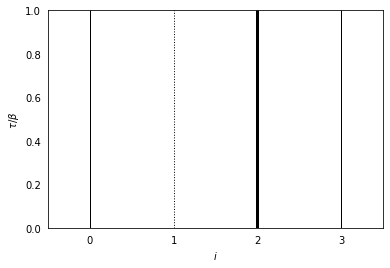

In [75]:
beta = 1.0
pimc.view_worldlines(data_struct,beta,figure_name=None)

## Updates

Here we will illustrate the set of ergodic updates that will modify the data structure to generate new worldline configurations.

### Insert / Delete Worm

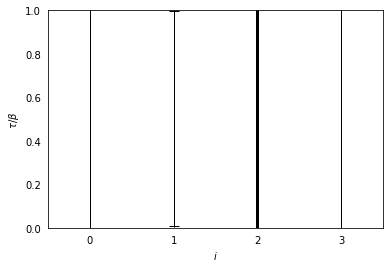

In [76]:
data_struct = pimc.create_data_struct(alpha_0)
head_loc = []
tail_loc = []
pimc.worm_insert(data_struct, beta, head_loc, tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)

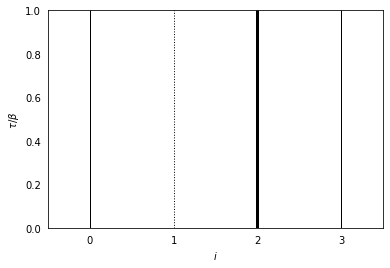

In [77]:
pimc.worm_delete(data_struct, beta, head_loc, tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Timeshift

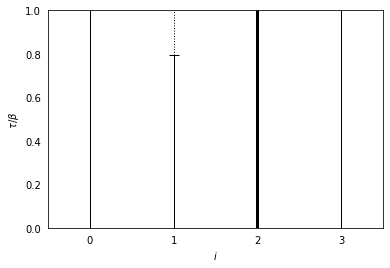

In [78]:
pimc.worm_insert(data_struct, beta, head_loc, tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)

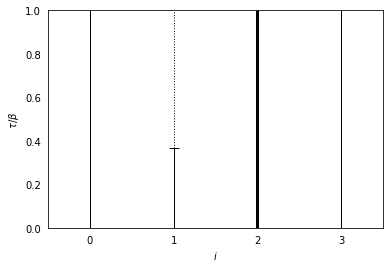

In [79]:
pimc.worm_timeshift(data_struct,beta,head_loc,tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Spaceshift Before

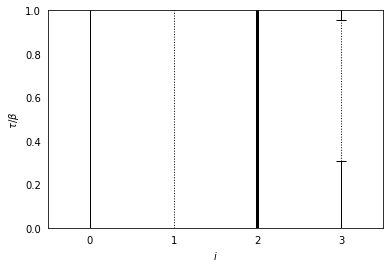

[3, 1] [3, 2]


In [88]:
data_struct = pimc.create_data_struct(alpha_0)
head_loc = []
tail_loc = []
pimc.worm_insert(data_struct, beta, head_loc, tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc,tail_loc)

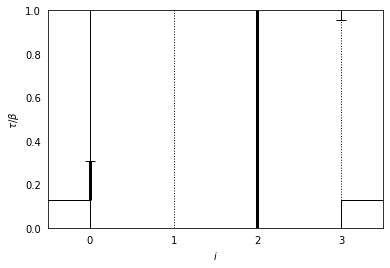

In [100]:
pimc.worm_spaceshift_before(data_struct,beta,head_loc,tail_loc)
pimc.view_worldlines(data_struct,beta,figure_name=None)

# This should have inserted behing Ira, but it didn't!